### re(정규 표현식)

In [1]:
import re

In [2]:
'''
sub() : 문자열에서 패턴과 일치하는 부분에 대해서 다른 문자열로 대체
'''
pattern = '\d'
repl = 'number'
string = '28 score'

result = re.sub(pattern, repl, string)
print(result)

numbernumber score


In [3]:
#### pattern 정리

# 문자 또는 숫자를 찾을 수 있는 패턴
pattern1 = '\w'

# 영어 알파벳을 찾을 수 있는 패턴
pattern2 = '[a-zA-Z]'

# 영어 알파벳 또는 숫자를 찾을 수 있는 패턴
pattern3 = '[a-zA-Z0-9]'

# 한글(자음, 모음, 글자)을 찾을 수 있는 패턴
pattern4 = '[ㄱ-ㅎㅏ-ㅣ가-힣]'

# 한글(글자)을 찾을 수 있는 패턴
pattern5 = '[가-힣]'

# 숫자를 찾을 수 있는 패턴(1)
pattern6 = '\d'

# 숫자를 찾을 수 있는 패턴(2)
pattern7 = '[0-9]'

# 한글(글자) 또는 숫자를 찾을 수 있는 패턴
pattern8 = '[가-힣0-9]'

# 한글(글자)를 제외한 나머지(한글 자음/모음, 영어, 기타 문자, 문장 부호, 숫자, ...)
pattern9 = '[^가-힣]'

### 영어 텍스트 분류

#### 데이터 불러오기

In [4]:
### 필요한 라이브러리 임폴트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = '/content/drive/MyDrive/KDT/딥러닝/자연어처리/labeledTrainData.tsv'

df = pd.read_csv(file_path, sep = '\t')
df

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


#### 데이터 분석

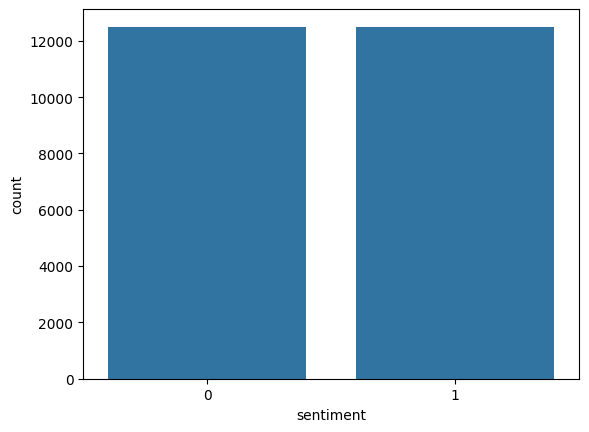

--------------------------------------------------------------------------------
sentiment
1    0.5
0    0.5
Name: proportion, dtype: float64


In [7]:
### 정답의 분포 시각화
sns.countplot(data = df, x = 'sentiment')
plt.show()

print('-'*80)

ratio = df['sentiment'].value_counts(normalize = True)
print(ratio)

In [8]:
len(df['review'])

25000

In [9]:
sample = 'I have a dream.'
print(sample.split())

['I', 'have', 'a', 'dream.']


#### 각 리뷰의 단어 갯수 분석

In [10]:
### 문장 --> split('') --> 단어로 분할 --> len() --> 단어의 수 추출(1)

length_list = []

for review in df.loc[:, 'review']:
  length = len(review.split())
  length_list.append(length)

print(length_list)

[433, 158, 378, 379, 367, 89, 112, 132, 163, 43, 48, 172, 382, 130, 112, 187, 395, 456, 241, 118, 231, 274, 254, 43, 38, 141, 225, 254, 670, 123, 54, 116, 120, 328, 373, 284, 135, 115, 169, 542, 250, 140, 121, 174, 164, 115, 80, 134, 252, 194, 161, 97, 212, 140, 57, 139, 148, 170, 72, 379, 515, 226, 132, 137, 122, 55, 968, 73, 194, 129, 128, 425, 184, 185, 130, 146, 263, 92, 192, 138, 133, 273, 420, 191, 428, 294, 346, 51, 124, 110, 107, 117, 124, 136, 136, 141, 165, 73, 197, 84, 215, 869, 94, 165, 48, 107, 125, 121, 361, 423, 183, 208, 321, 69, 117, 227, 124, 156, 106, 127, 187, 365, 136, 274, 337, 804, 463, 325, 111, 214, 133, 618, 166, 569, 425, 26, 328, 177, 168, 136, 166, 272, 165, 156, 255, 184, 169, 281, 334, 113, 83, 179, 161, 313, 288, 97, 225, 351, 453, 167, 344, 219, 104, 141, 243, 132, 933, 136, 112, 153, 171, 216, 282, 143, 440, 133, 349, 130, 152, 222, 445, 418, 789, 126, 221, 138, 85, 395, 119, 135, 771, 106, 67, 157, 74, 278, 74, 276, 224, 102, 110, 241, 121, 272, 874, 

In [11]:
### 문장 --> split('') --> 단어로 분할 --> len() --> 단어의 수 추출(2)

# 리뷰의 단어 길이를 측정하는 사용자 정의 함수 생성
#def calc(x):
#  return len(x.split())

# 사용자 정의 함수 --> lambda 함수 사용
word_counts = df.loc[:, 'review'].apply(lambda x : len(x.split(' ')))
print(word_counts)

0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64


In [12]:
### 각 리뷰의 단어 갯수 분포 --> 통계량 추출(1)

# 리뷰 단어 갯수 최소값
min = np.min(length_list)
print(f'리뷰 단어 갯수 최소값 : {min}')
print('-'*80)

# 리뷰 단어 갯수 평균값
mean = np.mean(length_list)
print(f'리뷰 단어 갯수 평균값 : {mean}')
print('-'*80)

# 리뷰 단어 갯수 중간값
median = np.median(length_list)
per50 = np.percentile(length_list, 50)
print(f'리뷰 단어 갯수 중간값 : {median, per50}')
print('-'*80)

# 리뷰 단어 갯수 3사분위 값
per75 = np.percentile(length_list, 75)
print(f'리뷰 단어 갯수 3사분위 값 : {per75}')
print('-'*80)

# 리뷰 단어 갯수 90% 값
per90 = np.percentile(length_list, 90)
print(f'리뷰 단어 갯수 90% 값 : {per90}')
print('-'*80)

# 리뷰 단어 갯수 최대값
max = np.max(length_list)
print(f'리뷰 단어 갯수 최대값 : {max}')

리뷰 단어 갯수 최소값 : 10
--------------------------------------------------------------------------------
리뷰 단어 갯수 평균값 : 233.78764
--------------------------------------------------------------------------------
리뷰 단어 갯수 중간값 : (174.0, 174.0)
--------------------------------------------------------------------------------
리뷰 단어 갯수 3사분위 값 : 284.0
--------------------------------------------------------------------------------
리뷰 단어 갯수 90% 값 : 458.0
--------------------------------------------------------------------------------
리뷰 단어 갯수 최대값 : 2470


In [13]:
### 각 리뷰의 단어 개수 분포 --> 통계량 추출(2)

# Series 자료형 --> describe() 함수 --> 요약 통계량 추출
stats = word_counts.describe(percentiles=[0.5, 0.75, 0.90])

# 결과 확인하기
print(f'각 리뷰별 단어의 개수에 대한 요약 통계량 : \n{stats}')

각 리뷰별 단어의 개수에 대한 요약 통계량 : 
count    25000.000000
mean       233.786240
std        173.745845
min         10.000000
50%        174.000000
75%        284.000000
90%        458.000000
max       2470.000000
Name: review, dtype: float64


[433, 158, 378, 379, 367, 89, 112, 132, 163, 43, 48, 172, 382, 130, 112, 187, 395, 456, 241, 118, 231, 274, 254, 43, 38, 141, 225, 254, 670, 123, 54, 116, 120, 328, 373, 284, 135, 115, 169, 542, 250, 140, 121, 174, 164, 115, 80, 134, 252, 194, 161, 97, 212, 140, 57, 139, 148, 170, 72, 379, 515, 226, 132, 137, 122, 55, 968, 73, 194, 129, 128, 425, 184, 185, 130, 146, 263, 92, 192, 138, 133, 273, 420, 191, 428, 294, 346, 51, 124, 110, 107, 117, 124, 136, 136, 141, 165, 73, 197, 84, 215, 869, 94, 165, 48, 107, 125, 121, 361, 423, 183, 208, 321, 69, 117, 227, 124, 156, 106, 127, 187, 365, 136, 274, 337, 804, 463, 325, 111, 214, 133, 618, 166, 569, 425, 26, 328, 177, 168, 136, 166, 272, 165, 156, 255, 184, 169, 281, 334, 113, 83, 179, 161, 313, 288, 97, 225, 351, 453, 167, 344, 219, 104, 141, 243, 132, 933, 136, 112, 153, 171, 216, 282, 143, 440, 133, 349, 130, 152, 222, 445, 418, 789, 126, 221, 138, 85, 395, 119, 135, 771, 106, 67, 157, 74, 278, 74, 276, 224, 102, 110, 241, 121, 272, 874, 

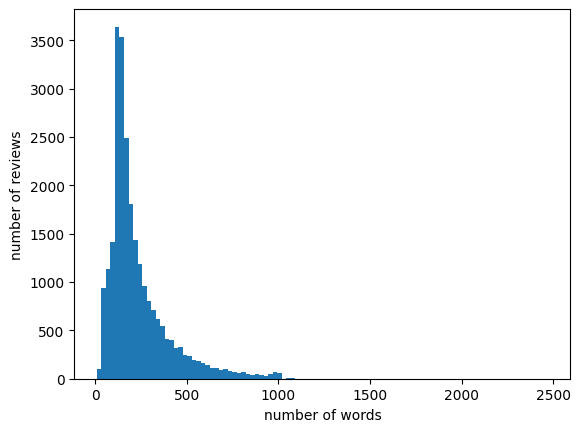

In [14]:
### 각 리뷰별 단어 수 --> 시각화(1)

print(length_list)
print('-'*80)

plt.hist(x = length_list, bins = 100)
plt.xlabel('number of words')
plt.ylabel('number of reviews')
plt.show()

#### 단어 빈도수 시각화

In [15]:
### review 칼럼 --> 문자열 데이터로 전환
text = ' '.join(df.loc[:, 'review'].values)
print(f'각 리뷰를 연결해서 만든 텍스트 데이터 : {len(text)}')

각 리뷰를 연결해서 만든 텍스트 데이터 : 33217763


In [16]:
text[:1000]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

(-0.5, 999.5, 499.5, -0.5)

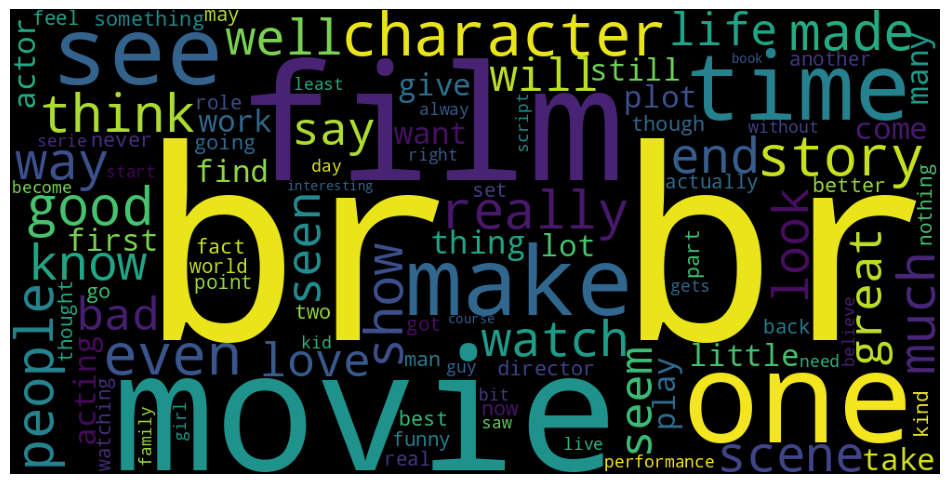

In [17]:
from wordcloud.wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500, max_words = 100, random_state = 0)

wordcloud.generate(text)

plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis('off')

#### 데이터 전처리

In [18]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

In [19]:
#nltk.download('all')

# 구두점 다운로드
nltk.download('punkt')

# 불용어 다운로드
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
### nltk --> 불용어 리스트 생성
stop_words = stopwords.words('english')
print(stop_words)
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
### 전처리 함수를 정의하기 위한 sample 데이터 생성

# 리뷰 1개 추출
sample = df.loc[:, 'review'].iloc[0]
print(sample)

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally star

In [22]:
### HTML 제거
,
# BeautifulSoup 객체 생성 --> get_text() --> tag를 제외한 text 추출
sample_text = BeautifulSoup(sample, 'lxml').get_text()

print(sample_text)

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 min

In [23]:
### 영어 문자를 제외한 나머지 --> 공백으로 대체
pattern = '[^a-zA-Z]'
cleaned_sample = re.sub(pattern, ' ', sample_text)
print(cleaned_sample)

With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    min

In [27]:
### 불용어 제거

# 불용어 --> 소문자, 텍스트 데이터 --> 소문자로 변환
cleaned_sample = cleaned_sample.lower()
print(cleaned_sample)
print('-'*80)

# 텍스트 데이터 --> nltk.word_tokenize() --> 토큰화
words_list = nltk.word_tokenize(cleaned_sample)
print(words_list)
print('-'*80)

# for문 + 조건문 이용 --> 불용어 제거
# cleaned_words = [word for word in words_list if word not in stop_words]
cleaned_words = []
for word in words_list:
  if word not in stop_words:
    cleaned_words.append(word)

print(cleaned_words)

with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for    min

In [28]:
### 토큰(단어) 리스트 --> join() --> 문장 생성
cleaned_review = ' '.join(cleaned_words)

# 결과 확인하기
print(cleaned_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [29]:
### 전처리 함수 정의

def preprocessing(review, remove_stopwords = False):
  # 불용어 제거는 옵션으로 선택 가능
  # 1. HTML 태그 제거
  review_text = BeautifulSoup(review, 'lxml').get_text()
  # 2. 영어 문자를 제외한 나머지 공백(' ')으로 대체
  pattern = '[^a-zA-Z]'
  review_text = re.sub(pattern, ' ', review_text)
  # 3. 대문자 --> 소문자, word_tokenize()로 토큰화
  words_list = nltk.word_tokenize(review_text.lower())
  # 4. 불용어 제거
  if remove_stopwords:
    # 불용어 리스트 생성
    stop_words = stopwords.words('english')
    # 불용어가 아닌 단어(토큰)들로 이루어진 새로운 리스트 생성
    cleaned_words = [word for word in words_list if word not in stop_words]
    # 5. 불용어가 아닌 단어 리스트로부터 문장 생성
    cleaned_review = ' '.join(cleaned_words)
  else:
    # 불용어 제거하지 않는 경우
    cleaned_review = ' '.join(words_list)

  return cleaned_review


In [30]:
from tqdm import tqdm

cleaned_reviews = []

for review in tqdm(df.loc[:, 'review']):
  cleaned_review = preprocessing(review = review, remove_stopwords = True)
  cleaned_reviews.append(cleaned_review)

print(cleaned_reviews[0])

  1%|          | 293/25000 [00:00<00:57, 430.71it/s]<ipython-input-29-c9bf72c5507e>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, 'lxml').get_text()
100%|██████████| 25000/25000 [00:58<00:00, 427.00it/s]

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [32]:
print(df)

            id  sentiment                                             review
0       5814_8          1  With all this stuff going down at the moment w...
1       2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2       7759_3          0  The film starts with a manager (Nicholas Bell)...
3       3630_4          0  It must be assumed that those who praised this...
4       9495_8          1  Superbly trashy and wondrously unpretentious 8...
...        ...        ...                                                ...
24995   3453_3          0  It seems like more consideration has gone into...
24996   5064_1          0  I don't believe they made this film. Completel...
24997  10905_3          0  Guy is a loser. Can't get girls, needs to buil...
24998  10194_3          0  This 30 minute documentary Buñuel made in the ...
24999   8478_8          1  I saw this movie as a child and it broke my he...

[25000 rows x 3 columns]


In [36]:
# 전처리한 결과 --> 데이터프레임 생성

data = {'review' : cleaned_reviews, 'sentiment' : df.loc[:, 'sentiment'].values}
#data
cleaned_df = pd.DataFrame(data = data)
cleaned_df

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1
...,...,...
24995,seems like consideration gone imdb reviews fil...,0
24996,believe made film completely unnecessary first...,0
24997,guy loser get girls needs build picked stronge...,0
24998,minute documentary bu uel made early one spain...,0


### 결과 저장

In [37]:
file_path = '/content/drive/MyDrive/KDT/딥러닝/자연어처리/cleaned_df.csv'

cleaned_df.to_csv(file_path, index = False)